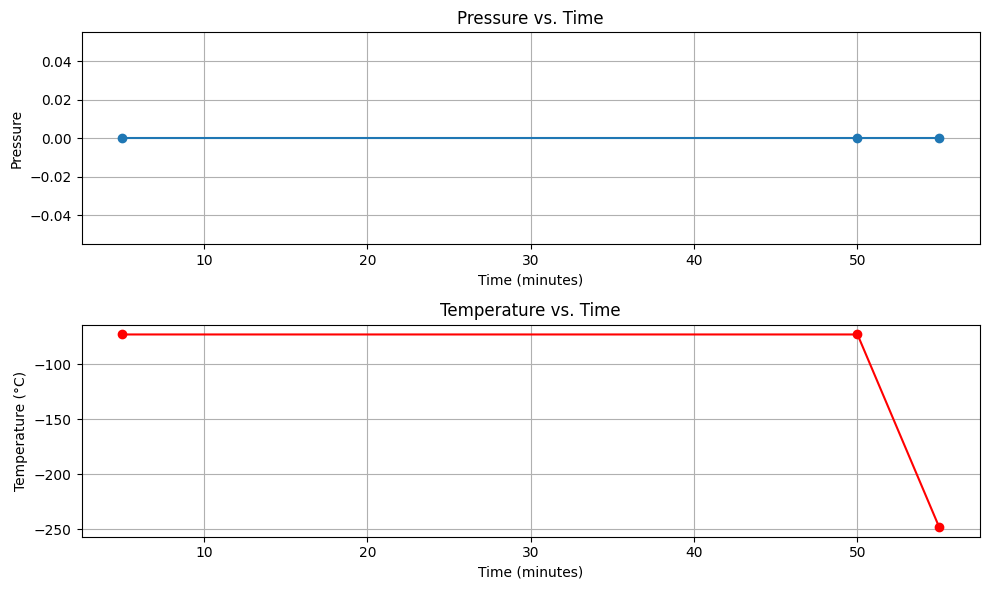

In [10]:
import xml.etree.ElementTree as ET
import re
import matplotlib.pyplot as plt

# Load the XML content (replace 'your_file.xml' with the path to your XML file)
with open('/content/3unitoperation_temperature.xml', 'r') as xml_file:
    xml_content = xml_file.read()

# Parse the XML content
root = ET.fromstring(xml_content)

# Initialize variables to store previous pressure and temperature
previous_pressure = 0
previous_temperature = 0

# Lists to store data for plotting
pressure_data = []
temperature_data = []
time_data = []

# Initialize time counter
time_counter = 0

# Iterate through each unit operation
for unit_operation in root.findall('UnitOperation'):
    process_parameters = unit_operation.find('.//Parameters')

    # Get Pressure and Temperature values
    pressure_element = process_parameters.find('Pressure')
    if pressure_element is not None and pressure_element.text.strip():
        previous_pressure = float(pressure_element.text)
    pressure_data.append(previous_pressure)

    temperature_element = process_parameters.find('Temperature')
    if temperature_element is not None and temperature_element.text.strip():
        temperature_value = float(re.search(r'\d+', temperature_element.text).group()) - 273.15
        previous_temperature = temperature_value
    temperature_data.append(previous_temperature)

    # Get Duration value or set default to 5 minutes
    duration_element = process_parameters.find('Duration')
    if duration_element is not None and duration_element.text.strip():
        duration_value = int(duration_element.text.split()[0])
    else:
        duration_value = 5

    # Update time counter and record time data
    time_counter += duration_value
    time_data.append(time_counter)

# Create plots for Pressure and Temperature
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(time_data, pressure_data, marker='o')
plt.xlabel('Time (minutes)')
plt.ylabel('Pressure')
plt.title('Pressure vs. Time')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time_data, temperature_data, marker='o', color='r')
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs. Time')
plt.grid(True)

plt.tight_layout()
plt.show()
